# 1.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__

'0.24.2'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [3]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Часть 1 (13 баллов)

1) Выведите последние 10 элеметнов датасета (1 балл)

In [0]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете? (1 балл)

In [0]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета? (1 балл)

In [0]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски? (1 балл)

In [17]:
print(df.isin([' ?']).any())

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже. (3 балла)

Ваш ответ: Возможно люди попросту не захотели или не смогли раскрыть эти данные по какой-то причине. 
Также возможно, что ответ невозможно было разобрать на бланке (но в таком случае возникает вопрос почему пропуски встречаются не везде). 

6) Какие и сколько различных рабочих классов workclass представлено в выборке? (2 балла)

In [0]:
df.workclass.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

7) Какой средний возраст женщин и мужчин? (1 балл)

In [0]:
print ("Возраст мужчин:", df[df['sex'] == " Male"].age.mean())
print ("Возраст женщин:", df[df['sex'] == " Female"].age.mean())

Возраст мужчин: 39.43354749885268
Возраст женщин: 36.85823043357163


8) Постройте гистограмму(bar) распределения образования людей (education) (2 балла)

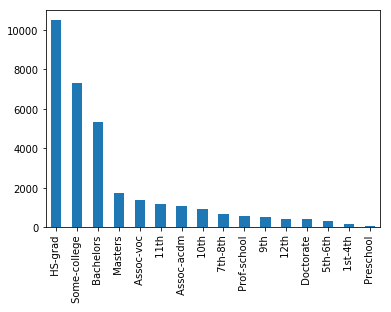

In [9]:
df['education'].value_counts().plot(kind='bar')

## Часть 2 (18 баллов)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? (2 балла)

In [16]:
print("<=50K Среднее:",df[df.income==" <=50K"].age.mean())
print("СКО",df[df.income==" <=50K"].age.std())
print(">50K Среднее:", df[df.income==" >50K"].age.mean())
print("СКО:", df[df.income==" >50K"].age.std())

<=50K Среднее: 36.78373786407767
СКО 14.020088490824813
>50K Среднее: 44.24984058155847
СКО: 10.51902771985177


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate) (2 балла)

In [28]:
df[df.income==" >50K"].education.isin([' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters',' Doctorate']).all()

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми. (2 балла)

In [55]:
married=df[df["marital.status"].str.startswith(" Married")]
not_married=pd.concat([df,married]).drop_duplicates(keep=False)
print("Доля зарабатывающих много среди женатых:", married[married.income==" >50K"].income.count()/married.income.count())
print("Доля зарабатывающих много среди холостых:", not_married[not_married.income==" >50K"].income.count()/not_married.income.count())

Доля зарабатывающих много среди женатых: 0.43692028280469614
Доля зарабатывающих много среди холостых: 0.06458589046700566


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country). (3 балла)

In [106]:
df_rich=df[df.income==" >50K"]
df_not_rich=df[df.income==" <=50K"]
pd.concat({">50":df_rich.groupby('native.country')['hours.per.week'].mean(),"<=50":df_not_rich.groupby('native.country')['hours.per.week'].mean()},axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,<=50,>50
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам. (4 балла)

In [181]:
def diff(x):
    x['diff']=x["capital.gain"]-x["capital.loss"]
    return x
  
def diff_discrete(x,minimum,step):
    x['diff_discrete']=(x['diff']-minimum)/step
    x['diff_discrete']=x['diff_discrete'].round(0)
    return x
  
df_diff=df.groupby('education').apply(diff)
step=(df_diff['diff'].max()-df_diff['diff'].min())/10
df_discrete=df_diff.groupby('diff').apply(diff_discrete,df_diff['diff'].min(),step)
df_discrete['diff_discrete'].value_counts()

0.0     29891
1.0      1961
2.0       493
10.0      159
3.0        50
4.0         7
Name: diff_discrete, dtype: int64

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще. (2 балла)

In [207]:
rich_females=df[df.sex==' Female'][df.income== ' >50K'].groupby('native.country')['income'].count()
females=df[df.sex==' Female'].groupby('native.country')['income'].count()
(rich_females/females).sort_values()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


native.country
 Mexico                        0.013699
 Jamaica                       0.023256
 El-Salvador                   0.028571
 Puerto-Rico                   0.038462
 Vietnam                       0.043478
 Haiti                         0.050000
 Dominican-Republic            0.057143
 Cuba                          0.075000
 Nicaragua                     0.083333
 Thailand                      0.090909
 South                         0.100000
 ?                             0.104294
 Poland                        0.105263
 United-States                 0.110721
 Germany                       0.116667
 Laos                          0.125000
 Ireland                       0.142857
 Honduras                      0.142857
 Philippines                   0.164384
 Portugal                      0.166667
 Hungary                       0.166667
 Hong                          0.166667
 India                         0.181818
 England                       0.187500
 Greece                  

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary (3 балла)

In [222]:
import random
def magic(x):
    if x['income']==' <=50K':
      x['magic.salary']=random.randint(0,50)
    else:
      x['magic.salary']=random.randint(51,200)
    return x

df_magic=df.apply(magic, axis=1)
df_magic.groupby('education')['magic.salary'].mean()/df_magic.groupby('education')['hours.per.week'].mean()

education
 10th            0.858606
 11th            0.879788
 12th            0.934809
 1st-4th         0.753695
 5th-6th         0.801359
 7th-8th         0.788919
 9th             0.814574
 Assoc-acdm      1.234486
 Assoc-voc       1.190450
 Bachelors       1.565386
 Doctorate       2.197887
 HS-grad         1.014065
 Masters         1.859725
 Preschool       0.611022
 Prof-school     2.074679
 Some-college    1.146361
dtype: float64